In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
data = pd.read_csv("./Desktop/Data Science/csv_file/datasets.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
# Drop the id column
data = data.drop('id', axis = 1)

# Convert the diagnosis column to numeric format
data['diagnosis'] = data['diagnosis'].factorize()[0]

# Fill all Null values with zero
data = data.fillna(value=0)

# Store the diagnosis column in a target object and then drop it
target = data['diagnosis']
data = data.drop('diagnosis', axis=1)

In [43]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [56]:
 # Turn dataframe into arrays
X = data.values

# Invoke the PCA method. Since this is a binaary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)
 
# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.659698
[t-SNE] KL divergence after 2000 iterations: 0.215829


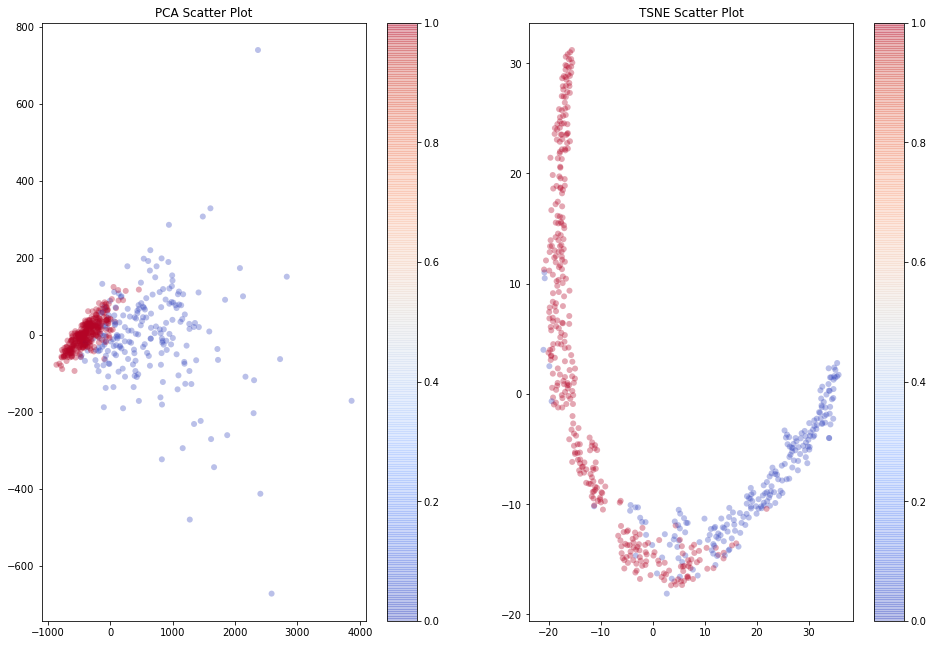

In [57]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16, 11))
plt.subplot(121)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c = target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title("PCA Scatter Plot")
plt.subplot(122)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title("TSNE Scatter Plot")
plt.show()

In [58]:
# Calling SKlearn scaling method
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [59]:
# Invoke the PCA method on the standardised data
pca = PCA(n_components=2)
pca_2d_std = pca.fit_transform(X_std)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results_std = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.003s...
[t-SNE] Computed neighbors for 569 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.487663
[t-SNE] KL divergence after 2000 iterations: 0.895369


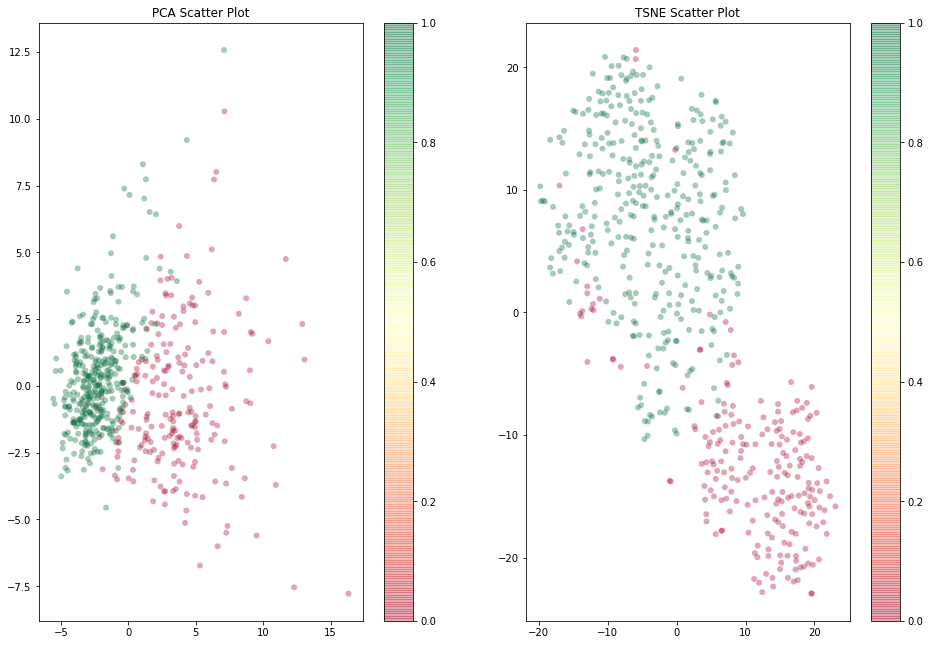

In [60]:
# Plot the TSNE and CPA visuals side-by-side
plt.figure(figsize = (16, 11))
plt.subplot(121)
plt.scatter(pca_2d_std[:, 0], pca_2d_std[:, 1], c = target,
           cmap = "RdYlGn", edgeColor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results_std[:, 0], tsne_results_std[:, 1], c=target,
           cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title("TSNE Scatter Plot")
plt.show()